Question 2: Part - a)
State the number of training samples. Also, state the number of test samples.


No. of Training Samples: 8143  
No. of Test Samples: 9752

Part B) Run a simulation using TensorFlow and vary the number of hidden units and make a plot.

In [80]:
import tensorflow as tf
# for layers
from tensorflow.keras.layers import Dense
#random functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [81]:
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')

testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [82]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [87]:
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [88]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [89]:
model_1 = tf.keras.Sequential()
model_1.add(Dense(16, activation='relu',input_shape=(5, ))) 
model_1.add(Dense(32, activation='softplus')) 
model_1.add(Dense(1, activation='sigmoid')) 

model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                96        
                                                                 
 dense_37 (Dense)            (None, 32)                544       
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [90]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model_1.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [91]:
fitmodel = model_1.fit(train_x, train_y, epochs=10, validation_split=0.3)

Epoch 1/10
88/88 [==============================] - 1s 3ms/step - loss: 25.0041 - accuracy: 0.6557 - val_loss: 0.5473 - val_accuracy: 0.7975
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8207 - val_loss: 0.5519 - val_accuracy: 0.7542
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8193 - val_loss: 0.4297 - val_accuracy: 0.8300
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8225 - val_loss: 0.5034 - val_accuracy: 0.8292
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8329 - val_loss: 0.4580 - val_accuracy: 0.8233
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8261 - val_loss: 0.3712 - val_accuracy: 0.8483
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8329 - val_loss: 0.4247 - val_accuracy: 0.8392
Epoch 8/10
88/88 [=

In [93]:
training_loss, training_acc = model_1.evaluate(train_x, train_y)
testing_loss, testing_acc = model_1.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8200


In [94]:
pred = model_1.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 1ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/10
88/88 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8389 - val_loss: 0.3831 - val_accuracy: 0.8417
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8496 - val_loss: 0.4847 - val_accuracy: 0.8050
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8211 - val_loss: 0.5783 - val_accuracy: 0.8192
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.8179 - val_loss: 0.4931 - val_accuracy: 0.8442
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.8025 - val_loss: 1.4832 - val_accuracy: 0.6383
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8364 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8257 - val_loss: 1.4754 - val_accuracy: 0.8017
Epoch 8/10
88/88 [==

Text(0, 0.5, 'Accuracy')

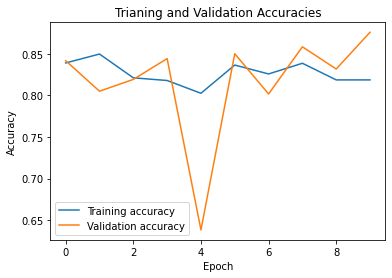

In [95]:
fitModel = model_1.fit(train_x, train_y, epochs = 10, validation_split = 0.3)

#prints key information

plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

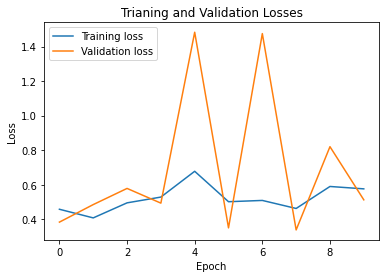

In [96]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [98]:
test_predict = model_1.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)

32/32 [==============================] - 0s 962us/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Part c) Discuss (interpret) the results.

Answer ) It is a three layer model. The accuracy is 82%. 

Part d) Add a second hidden layer, and train a few architectures with 2 hidden layers. Report what
architectures you tried (expressed as 5-h1-h2-1, i.e., 5 input, h1 hidden in first layer, h2 hidden
in second layer, and one output unit),

In [99]:
model_2 = tf.keras.Sequential()
model_2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model_2.add(Dense(32, activation='softplus'))
model_2.add(Dense(32, activation='softplus')) 
model_2.add(Dense(1, activation='sigmoid')) 

model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 16)                96        
                                                                 
 dense_40 (Dense)            (None, 32)                544       
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [100]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model_2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])
fitmodel = model_2.fit(train_x, train_y, epochs=5, validation_split=0.3)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 3.2610 - accuracy: 0.7300 - val_loss: 0.7593 - val_accuracy: 0.5167
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7757 - val_loss: 0.5485 - val_accuracy: 0.7792
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7811 - val_loss: 0.5623 - val_accuracy: 0.7150
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7900 - val_loss: 0.5703 - val_accuracy: 0.7692
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7889 - val_loss: 0.4690 - val_accuracy: 0.8042


In [101]:
training_loss, training_acc = model_2.evaluate(train_x, train_y)
testing_loss, testing_acc = model_2.evaluate(test_x, test_y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8060


In [102]:
pred = model_2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 1ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8032 - val_loss: 0.5882 - val_accuracy: 0.8033
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7982 - val_loss: 0.5049 - val_accuracy: 0.8183
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8064 - val_loss: 0.6972 - val_accuracy: 0.7092
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.7554 - val_loss: 0.5536 - val_accuracy: 0.7567
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.8093 - val_loss: 0.4770 - val_accuracy: 0.8025


Text(0, 0.5, 'Accuracy')

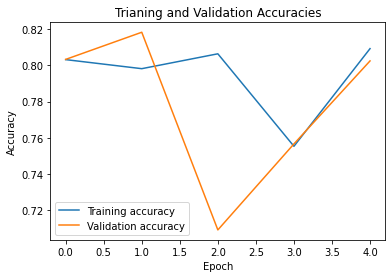

In [103]:
fitModel = model_2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)
#prints key information

plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

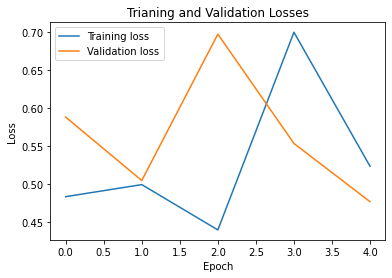

In [104]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')